In [1]:
import gzip
import os
from urllib.request import urlretrieve
import numpy as np

from convenience_functions import get_mnist

In [2]:
train_X, train_Y, test_X, test_Y = get_mnist("C:/Users/nisha/project_repositories/MNIST_from_scratch/MNIST_From_Scratch/dataset")


print(f'Train X shape = {train_X.shape}')
print(f'Train Y shape = {train_Y.shape}')
print(f'Test  X shape  = {test_X.shape}')
print(f'Test  Y shape  = {test_Y.shape}')


Train X shape = (60000, 784)
Train Y shape = (60000, 10)
Test  X shape  = (10000, 784)
Test  Y shape  = (10000, 10)


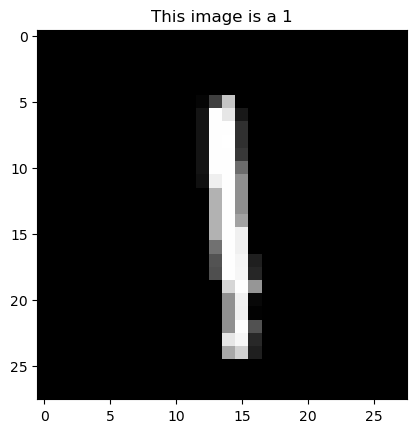

In [3]:
import matplotlib.pyplot as plt

# pick a sample to plot
sample = 8
image = train_X[sample].reshape(28, 28)
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title(f'This image is a {int(np.argwhere(train_Y[sample]== 1))}')
plt.show()